<a href="https://colab.research.google.com/github/mvkumar14/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## 1) Replicate Lesson Code:

### Matplotlib PyPlot Syntax

Note the different behaviors of ```plt.plot()``` and ```plt.show()```

*   ```plt.plot```  simply plots the data once. If its called again then the values are updated based on any changes made. (so this will plot additional graphs to the SAME figure
*   ```plt.show``` plots the data, and then "somehow internally" tell matplotlib to create a new figure for new graphs, just like how figure() would in matlab or octave



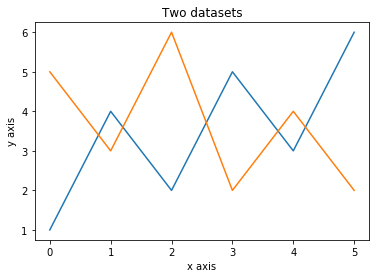

In [0]:
import matplotlib.pyplot as plt
sample_data = [1,4,2,5,3,6]
plt.plot(sample_data)
plt.title('Test Graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.plot()

more_data = [5,3,6,2,4,2]
plt.plot(more_data)
plt.title('Two datasets')
plt.show()
 #NOTICE THAT:
 #1 The title changed
 #2 The second plot was plotted on the same figure (same axes)

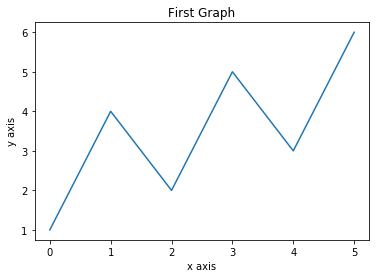

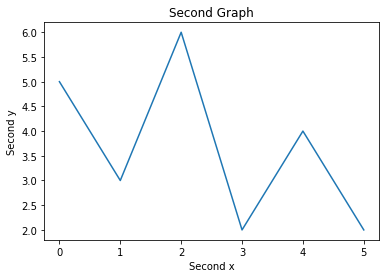

In [0]:
import matplotlib.pyplot as plt
sample_data = [1,4,2,5,3,6]
plt.plot(sample_data)
plt.title('First Graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

more_data = [5,3,6,2,4,2]
plt.plot(more_data)
plt.title('Second Graph')
plt.xlabel('Second x')
plt.ylabel('Second y')
plt.show()

# You don't have to do plt.show() here because jupyter notebooks
# automatically show the data, but it is good practice to be explicit so if the 
# code is copied somewhere else it will retain the proper outputs

### Matplotlib's fig, ax Syntax (also known as Object Oriented syntax)

Use this when you want multiple sets of axes (subplots), or if you need to heavily customize something. If you want to be minimally sufficient it is a good idea to use this syntax as you can do everythnig that the plt syntax can do here

Think of the fig and ax as two different objects whose properties can be set, or changed with .notation

Text(0.5, 0, 'my x label')

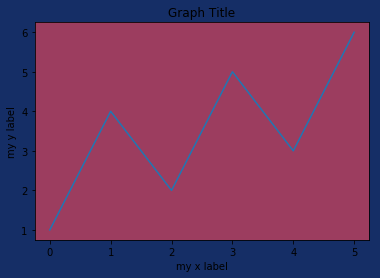

In [0]:
fig, ax = plt.subplots()

#figures have properties outside of the individual plots 
#spacing between graphs?
#colors ...
fig.patch.set(facecolor='#152E66')

#ax is where you input data, and set properties of the "graphing region"
#x,y,ticks, scales,multiple y axes?, title...
ax.plot(sample_data)
ax.set(facecolor='#9C3D5F')
ax.set_title('Graph Title')
ax.set_ylabel('my y label')
ax.set_xlabel('my x label')


### Making Explanitory Visualizations with Matplotlib


We are going to replicate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [0]:
from IPython.display import display,Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=500)
display(example)

Here is the original data: Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Some sources of interest: 
Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

### Making a Prototype

To better understand the problem

#### Basic Graph

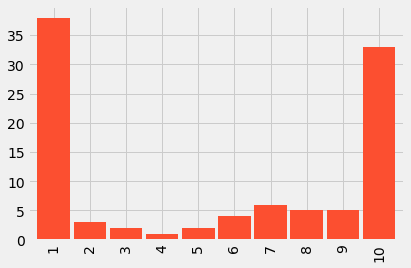

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38,3,2,1,2,4,6,5,5,33], index=range(1,11))

fake.plot.bar(color='C1',width=0.9)

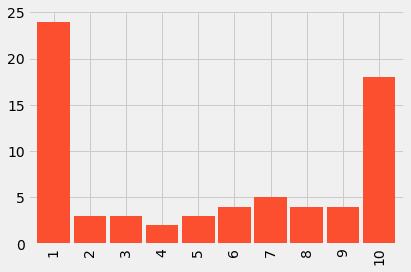

In [0]:
#here is another way to create the fake data. This way could probably be automated to some
#extent, but its probably more useful when you want a set of random data. You can place that random
#data in a dataframe
fake2 = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1',width=0.9)

#### (Tangent) Experiment with "Random" Library 

seeing if I can find a better use-case for the second method of plotting test data for prototying a graph

In [0]:
import random as rd
test3 =[]
rand_length =10
[test3.append(rd.randint(1,10)) for _ in range(rand_length)]

print(type(test3))
test3

<class 'list'>


[5, 6, 9, 4, 9, 6, 10, 4, 5, 7]

In [0]:
#Now I need to turn the list into something closer to a df

#Way 1 use pd.DataFrame
test3df =pd.DataFrame(test3,columns=["my_value"])
print(type(test3df))
test3df

<class 'pandas.core.frame.DataFrame'>


,my_value
0,5
1,6
2,9
3,4
4,9
5,6
6,10
7,4
8,5
9,7


In [0]:
#The other way is to use a pandas series
test3df_b= pd.Series(test3)
test3df_b

# This might be useful in cases where you don't really need the full dataframe, 
#you just need a column

0     5
1     6
2     9
3     4
4     9
5     6
6    10
7     4
8     5
9     7
dtype: int64

In [0]:
#this returns a dataframe where the index is the value being counted
#and the first (and only) column of values is the amount of times the 
#index occurs in the test3df.random column
test3df.my_value.value_counts()

8    3
2    2
9    1
7    1
6    1
4    1
1    1
Name: my_value, dtype: int64

In [0]:
#I'm taking the data frame above which was sorted by 
#descending value count, and now I'm sorting, instead
#by the index
print(test3df.my_value.value_counts().sort_index())
test3df_plottable = test3df.my_value.value_counts().sort_index()

1    1
2    2
4    1
6    1
7    1
8    3
9    1
Name: my_value, dtype: int64


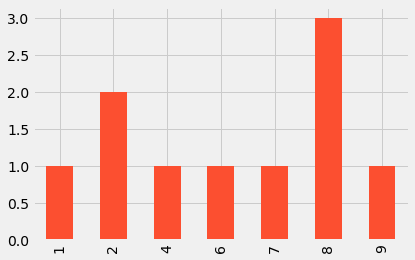

In [0]:
#^Now I can plot this data with matplotlib
test3df_plottable.plot.bar(color ='C1')

#### Annotate with Text

In [0]:
#make sure our fake data is good
fake

1     38
2      3
3      2
4      1
5      2
6      4
7      6
8      5
9      5
10    33
dtype: int64

figure size in pixels: [432. 288.]


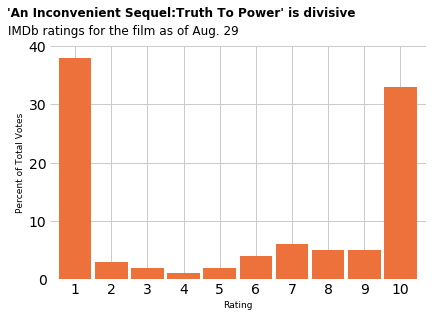

In [0]:
#Here is where we get the details of the graph down:

fig, ax = plt.subplots()

#Set the background of the figure:
fig.patch.set(facecolor ='white')

#Get some data in there:
#ax.bar(x=range(1,11),height=fake)

#We can do it that way ^ but the results aren't quite correct
#here is another way. (the way we did it in class)
fake.plot.bar(width=.9,color="#ED713A")

#I want some information about the size of the graph
print('figure size in pixels:',fig.get_size_inches()*fig.dpi)

#Set Title and Subtitle:
ax.set_title("'An Inconvenient Sequel:Truth To Power' is divisive",
             fontsize = 12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29',
        fontsize=12,
        x=-1.85,
        y=42)

#Set the plot background color:
ax.set(facecolor='white')

#Set x and y label:
ax.set_xlabel('Rating',fontsize=9)
ax.set_ylabel('Percent of Total Votes',fontsize=9)

#Ideally this should change the tick font, but I still have to figure
#it out
ax.tick_params(axis='both',color='red')


#Fix the x and y axis tick marks in and grid
ax.set_xticklabels(range(1,11),rotation=0,fontname='Meiryo')
ax.set_yticklabels(range(0,50,10),fontname='Meiryo')
ax.set_yticks(range(0,50,10))


#Get rid of the spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
fig = plt.gcf()


### Reproduce Visual with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
#In class we figured out that really we only care about the last row of this data
#the last row contains all the aggregate information about the dataset

#Lets convert the timestamps to datetime objects
df.timestamp=pd.to_datetime(df.timestamp)
print(type(df.timestamp[2]))
df.head(4)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0


In [0]:
#use timestamp as the index instead of numbers, so we can select
#rows by timestamp:
df.set_index('timestamp',inplace=True)

In [0]:
#Now we only really want the last row:
#First get the data from the last day
lastday = df['2017-08-29']


In [0]:
#Then get the "all IMDB" users from this day:
lastday_filtered=lastday[lastday['category']=='IMDb users']
lastday_filtered.shape

(140, 26)

In [0]:
#this is still big dataframe. The information is updated often, 
#we want the last entry (by time) from this day:
#luckly it is sorted by time so we can:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [0]:
#now we want just the percent values from this table:
#lets transpose it so that we get the rows in a column

#I initially thought about melting it so that I could isolate values
#but that would produce too many duplicate values. Resetting index, 
#and transposing should be sufficient
# final_b = final.reset_index()
# pd.melt(final_b,id_vars=['timestamp','respondents','category'])

#Here is what Ryan actually did in class:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final[pct_columns].T


timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
#from here we want a numeric index again, and we want the final df
#to be long not wide

plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


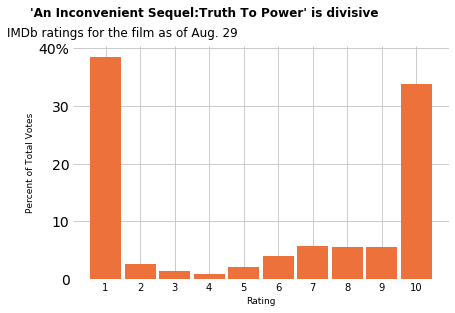

In [0]:
import matplotlib.font_manager
#Now we can plot the real data with the template we created before:
#Here is where we get the details of the graph down:

fig, ax = plt.subplots()

#Set the background of the figure:
fig.patch.set(facecolor ='white')

#set the bars:
ax.bar(x=range(1,11),height=plot_data['percent'],width=0.9,color = '#ED713A')

#Weirdly though if I just try to run the following it produces a new graph
#plot_data.plot.bar(width=0.9)

#Set Title and Subtitle:
ax.set_title("'An Inconvenient Sequel:Truth To Power' is divisive",
             fontsize = 12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29',
        fontsize=12,
        x=-1.85,
        y=42)

#Set the plot background color:
ax.set(facecolor='white')

#Set x and y label:
ax.set_xlabel('Rating',fontsize=9)
ax.set_ylabel('Percent of Total Votes',fontsize=9)

#Ideally this should change the tick font, but I still have to figure
#it out
ax.tick_params(axis='both',color='red')

#Fix the x and y axis tick marks in and grid
ax.set_xticklabels(range(1,11),rotation=0,fontname='Comic Sans MS',size=10)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10),fontname='Meiryo')
ax.set_yticks(range(0,50,10))
plt.plot()

#add the ytick lablel %
my_y_labels=['0','10','20','30','40%']
ax.set_yticklabels(labels=['0','10','20','30','40%'],fontname='Meiryo')
#Get rid of the spines()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)


I'm having trouble with changing the font.This is something I should come back to. 

## 2) Replicate anothe Example:

### Prototype:

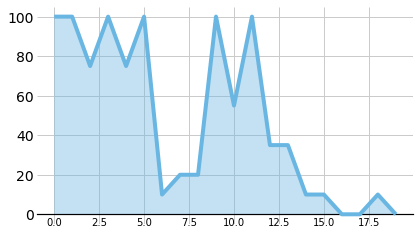

In [0]:
%matplotlib inline
fig, ax = plt.subplots()
test = [100,100,75,100,75,100,10,20,20,100,55,100,35,35,10,10,0,0,10,0]

#zorder is to make sure that the line ends up on top of everything.
ax.plot(test,zorder=3,color="#69B6E3")
ax.set_facecolor('white')

#here is how you fill in the area under the curve
#arguments are: where to fill , and if you want to make it 
#see-through use alpha
ax.fill_between(range(0,len(test)),0,test,color='#69B6E3',alpha=0.4)

#This is how you get rid of the spines in the list:
lstspines=['left','right','top']
for i in lstspines:
  ax.spines[i].set_visible(False)


#This makes the bottom spine align to the axis,
#and controls the thickness of the line
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.2)

#Change the label fonts
a = range(-20,120,20)
ax.set_yticklabels(a,fontname='Meiryo',size=14);

#not sure why the range needs to be -20 - 120 on the yticklabels
# for i in range(0,120,20):
#   print(i)


### Downloading Actual Data

Original Articlle: https://fivethirtyeight.com/features/louisiana-tech-was-the-uconn-of-the-80s/

Original Source: https://github.com/fivethirtyeight/data/tree/master/ncaa-womens-basketball-tournament

For more fivethirtyeight data:https://data.fivethirtyeight.com/



In [0]:
from google.colab import files
files.upload()

Saving ncaa-womens-basketball-tournament-history.csv to ncaa-womens-basketball-tournament-history.csv


{'ncaa-womens-basketball-tournament-history.csv': b"\xef\xbb\xbfYear,School,Seed,Conference,Conf. W,Conf. L,Conf. %,Conf. place,Reg. W,Reg. L,Reg. %,How qual,1st game at home?,Tourney W,Tourney L,Tourney finish,Full W,Full L,Full %\r\n1982,Arizona St.,4,Western Collegiate,-,-,-,-,23,6,79.3,at-large,Y,1,1,RSF,24,7,77.4\r\n1982,Auburn,7,Southeastern,-,-,-,-,24,4,85.7,at-large,N,0,1,1st,24,5,82.8\r\n1982,Cheyney,2,Independent,-,-,-,-,24,2,92.3,at-large,Y,4,1,N2nd,28,3,90.3\r\n1982,Clemson,5,Atlantic Coast,6,3,66.7,4th,20,11,64.5,at-large,N,0,1,1st,20,12,62.5\r\n1982,Drake,4,Missouri Valley,-,-,-,-,26,6,81.3,auto,Y,2,1,RF,28,7,80\r\n1982,East Carolina,6,Independent,-,-,-,-,19,7,73.1,at-large,N,0,1,1st,19,8,70.4\r\n1982,Georgia,5,Southeastern,-,-,-,-,21,8,72.4,at-large,N,0,1,1st,21,9,70\r\n1982,Howard,8,Mid-Eastern,-,-,-,-,14,10,58.3,auto,N,0,1,1st,14,11,56\r\n1982,Illinois,7,Big Ten,-,-,-,-,21,8,72.4,at-large,N,0,1,1st,21,9,70\r\n1982,Jackson St.,7,Southwestern,-,-,-,-,28,7,80,auto,N,0,1,1

In [0]:
df = pd.read_csv('ncaa-womens-basketball-tournament-history.csv')

In [0]:
print(df.shape)
df.head()

(2092, 19)


,Year,School,Seed,Conference,Conf. W,Conf. L,Conf. %,Conf. place,Reg. W,Reg. L,Reg. %,How qual,1st game at home?,Tourney W,Tourney L,Tourney finish,Full W,Full L,Full %
0,1982,Arizona St.,4,Western Collegiate,-,-,-,-,23,6,79.3,at-large,Y,1,1,RSF,24,7,77.4
1,1982,Auburn,7,Southeastern,-,-,-,-,24,4,85.7,at-large,N,0,1,1st,24,5,82.8
2,1982,Cheyney,2,Independent,-,-,-,-,24,2,92.3,at-large,Y,4,1,N2nd,28,3,90.3
3,1982,Clemson,5,Atlantic Coast,6,3,66.7,4th,20,11,64.5,at-large,N,0,1,1st,20,12,62.5
4,1982,Drake,4,Missouri Valley,-,-,-,-,26,6,81.3,auto,Y,2,1,RF,28,7,80


In [0]:
df.School.value_counts().loc['Long Beach St.']


12

In [467]:
louie = df[df['School']=='Louisiana Tech']
print(louie.shape)
socal = df[df['School']=='Southern California']
print(socal.shape)
beach = df[df['School']=="Long Beach St."]
print(beach.shape)
dominion = df[df['School']=="Old Dominion"]
print(dominion.shape)

(27, 19)
(16, 19)
(12, 19)
(25, 19)


In [468]:
louie = louie.set_index('Year')
louie.tail()

,School,Seed,Conference,Conf. W,Conf. L,Conf. %,Conf. place,Reg. W,Reg. L,Reg. %,How qual,1st game at home?,Tourney W,Tourney L,Tourney finish,Full W,Full L,Full %
Year,,,,,,,,,,,,,,,,,,
2004,Louisiana Tech,5,Western Athletic,17,1,94.4,1st,27,2,93.1,auto,N,2,1,RSF,29,3,90.6
2005,Louisiana Tech,11,Western Athletic,14,4,77.8,T1st,20,9,69.0,at-large,N,0,1,1st,20,10,66.7
2006,Louisiana Tech,11,Western Athletic,15,1,93.8,1st,26,4,86.7,auto,N,0,1,1st,26,5,83.9
2010,Louisiana Tech,14,Western Athletic,11,5,68.8,1st,23,8,74.2,auto,N,0,1,1st,23,9,71.9
2011,Louisiana Tech,10,Western Athletic,15,1,93.8,1st,24,7,77.4,at-large,N,0,1,1st,24,8,75


In [0]:
#this sorted the data
louie.reset_index(inplace=True)

In [394]:
#for now I'm just going to plot louisiana tech
# I need to create a column that has only the year, and the seed;
louie.head()
louie.index
louie_subset = louie[['Seed']]
louie_subset


,Seed
Year,
1982,1
1983,1
1984,1
1985,1
1986,2
1987,1
1988,2
1989,1
1990,1


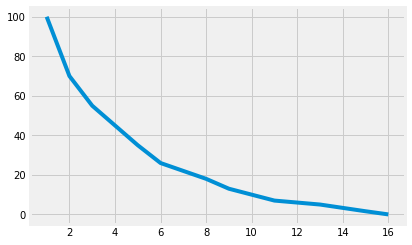

In [366]:
#rough estimation of the "weight" function used to calculate seed_value
x_seed=list(range(1,17,1))
y_seed= [100,70,55,45,35,26,22,18,13,10,7,6,5,3.3,1.6,0]
fig,ax = plt.subplots()
ax.plot(x_seed,y_seed)


In [367]:
#I'm going to try to make this a dataframe, and use
#merge to create the seed_value column
func_dict = dict(zip(x_seed,y_seed))
func_dict

{1: 100,
 2: 70,
 3: 55,
 4: 45,
 5: 35,
 6: 26,
 7: 22,
 8: 18,
 9: 13,
 10: 10,
 11: 7,
 12: 6,
 13: 5,
 14: 3.3,
 15: 1.6,
 16: 0}

In [389]:
#Why is this long instead of wide?
seed_keys = pd.DataFrame(data = [y_seed,x_seed])
seed_keys.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,100,70,55,45,35,26,22,18,13,10,7,6,5,3.3,1.6,0
1,1,2,3,4,5,6,7,8,9,10,11,12,13,14.0,15.0,16


In [399]:
#This works better:
seed_keys = pd.DataFrame({'Seed':x_seed,'Seed_value':y_seed})
seed_keys.dtypes

Seed            int64
Seed_value    float64
dtype: object

In [404]:
print(louie_subset.shape)
louie_subset.dtypes

(27, 1)


Seed    object
dtype: object

In [0]:
#Seed in louie should be an int not an object
louie_subset=louie_subset['Seed'].astype('int64')


In [427]:
louie_subset.dtypes

dtype('int64')

In [432]:
#To retain the year information during the merge I have to 
#make sure that year isn't index
louie_subset = louie_subset.reset_index()
louie_subset.head()

,index,Year,Seed
0,0,1982,1
1,1,1983,1
2,2,1984,1
3,3,1985,1
4,4,1986,2


In [445]:
#Now I have two dataframes to merge:
#seed_keys which has "Seed", and "Seed_value"
#louie_subset which is indexed by year and has "Seed"
print(pd.merge(seed_keys,louie_subset,how='inner').shape)
print(pd.merge(seed_keys,louie_subset,how='outer').shape)
print(pd.merge(seed_keys,louie_subset,how='left').shape)
print(pd.merge(seed_keys,louie_subset,how='right').shape)
merged = pd.merge(louie_subset,seed_keys,how='left')

(27, 4)
(34, 4)
(34, 4)
(27, 4)


In [477]:
test=merged.set_index('Year').drop(labels=['Seed','index'],axis=1)
test.tail()

,Seed_value
Year,
2004,35.0
2005,7.0
2006,7.0
2010,3.3
2011,10.0


### Result

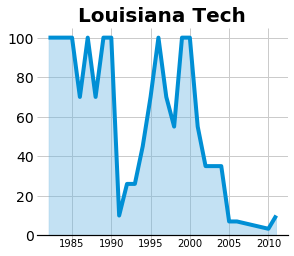

In [476]:
fig, ax = plt.subplots()
ax.plot(test.index,test.Seed_value)

fig.set_size_inches(4,4)

ax.set_facecolor('white')

#here is how you fill in the area under the curve
#arguments are: where to fill , and if you want to make it 
#see-through use alpha
ax.fill_between(test.index,0,test.Seed_value,color='#69B6E3',alpha=0.4)

#This is how you get rid of the spines in the list:
lstspines=['left','right','top']
for i in lstspines:
  ax.spines[i].set_visible(False)

#Adding a title:
ax.set_title('Louisiana Tech',fontsize=20,weight='bold')


#This makes the bottom spine align to the axis,
#and controls the thickness of the line
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.2)

#Change the label fonts
a = range(-20,120,20)
ax.set_yticklabels(a,fontname='Meiryo',size=14);

Note that the end of this graph doesn't quite match the fivethirtyeight article. This is because the article rounds up to 30 years, and assumes values of zero for all teams for every year after 2011. I only completed one section of this plot. There are 4 other subplots within the figure, and I didn't have time to put them all in

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here